<a href="https://colab.research.google.com/github/Valeram12/neural-networks/blob/main/lab7/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Попередньо було створено датасет з 5 шрифтами (main.py)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, regularizers

df = pd.read_csv("https://raw.githubusercontent.com/Valeram12/neural-networks/refs/heads/main/lab6/fonts.csv")
df

,font,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,TIMES,1,1,9,59,129,185,255,219,1,...,29,99,99,141,239,227,157,143,34,1
1,ARIAL,1,1,1,1,1,94,186,255,255,...,1,1,1,1,1,94,244,255,244,94
2,CALIBRI,1,1,66,255,255,255,229,1,1,...,1,1,1,1,1,1,1,1,1,1
3,TIMES,1,1,1,1,255,255,255,255,255,...,171,1,1,1,1,1,1,1,1,1
4,ARIAL,1,1,1,1,1,1,1,1,1,...,1,242,255,255,255,203,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47548,TIMES,1,1,1,1,1,1,1,19,184,...,96,7,1,1,1,1,1,1,1,1
47549,NUMERICS,1,1,1,1,1,255,255,255,255,...,1,1,1,1,1,1,1,1,1,1
47550,NUMERICS,1,1,128,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
47551,ARIAL,41,50,92,103,121,151,176,200,209,...,211,222,224,231,231,231,222,217,173,163


На діаграмі можно побачити розбоділ кількості даних для навчання по кожному шрифту

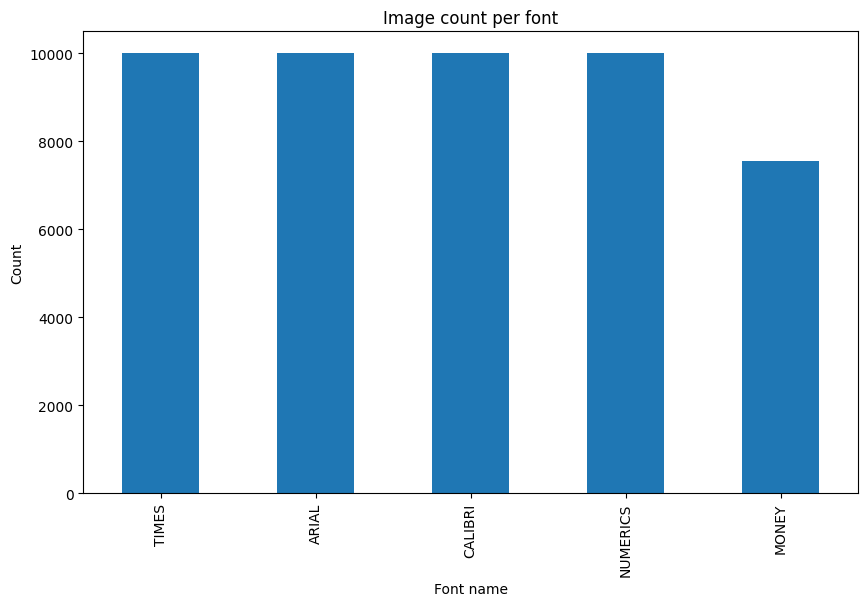

In [2]:
font_counts = df['font'].value_counts()

plt.figure(figsize=(10, 6))
font_counts.plot(kind='bar')
plt.title('Image count per font')
plt.xlabel('Font name')
plt.ylabel('Count')
plt.show()

Перегляд даних що є в датасеті

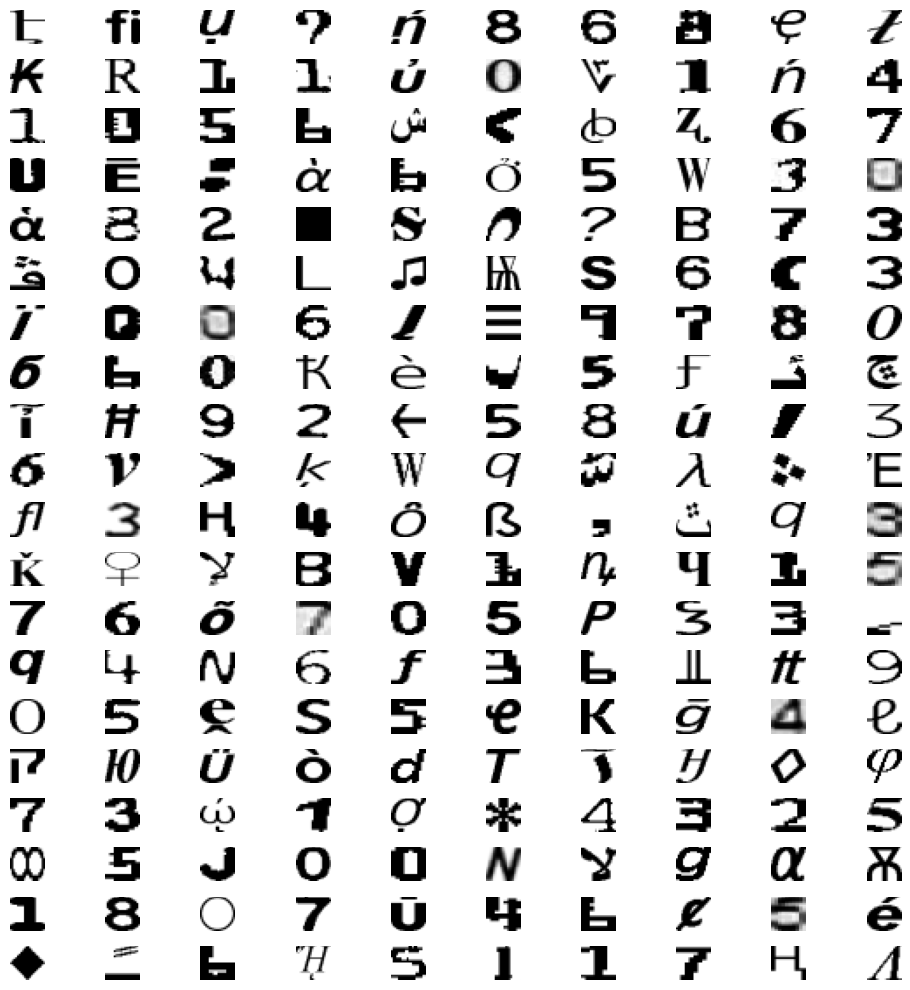

In [3]:

def extract_image(index):
    pixel_data = df.iloc[index:index + 1, 1:401].values.reshape((20, 20))
    return (255 - pixel_data).astype(np.uint8)

columns, rows = 10, 20
fig, axes_grid = plt.subplots(rows, columns, figsize=(10, 10))

for row in range(rows):
    for col in range(columns):
        img_index = row * columns + col
        axes_grid[row, col].imshow(extract_image(img_index), cmap='gray')
        axes_grid[row, col].axis('off')

plt.tight_layout()
plt.show()

In [4]:
def plot_training_history(history_data):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].plot(history_data['accuracy'], label='Training Accuracy')
    axes[0].plot(history_data['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(loc='upper left')

    axes[1].plot(history_data['loss'], label='Training Loss')
    axes[1].plot(history_data['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(loc='upper left')

    plt.tight_layout()
    plt.show()


def fit_model_and_plot(model, num_epochs, batch_size, existing_history=None):
    new_history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    if existing_history:
        for metric, values in new_history.history.items():
            existing_history.setdefault(metric, []).extend(values)
        combined_history = existing_history
    else:
        combined_history = new_history.history

    plot_training_history(combined_history)

X = df.iloc[:, 1:]
y = df.iloc[:, 0]


In [6]:
X_reshaped = X.values.reshape(-1, 20, 20, 1) / 255.0

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = pd.get_dummies(y_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=42)

# Навчання
Спробував декілька варіантів моделей, отримавши найкращий результат, залишив його

In [29]:
cnn1 = models.Sequential()

cnn1.add(layers.Input(shape=(20, 20, 1)))
cnn1.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn1.add(layers.MaxPooling2D((2, 2)))
cnn1.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn1.add(layers.MaxPooling2D((2, 2)))
cnn1.add(layers.Flatten())
cnn1.add(layers.Dense(128, activation='relu'))
cnn1.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

cnn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = {}


Epoch 1/15
595/595 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.4908 - loss: 1.1745 - val_accuracy: 0.6833 - val_loss: 0.7530
Epoch 2/15
595/595 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.7053 - loss: 0.7100 - val_accuracy: 0.7433 - val_loss: 0.6258
Epoch 3/15
595/595 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.7632 - loss: 0.5760 - val_accuracy: 0.7786 - val_loss: 0.5416
Epoch 4/15
595/595 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.7908 - loss: 0.5027 - val_accuracy: 0.7902 - val_loss: 0.5151
Epoch 5/15
595/595 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8156 - loss: 0.4463 - val_accuracy: 0.8012 - val_loss: 0.4876
Epoch 6/15
595/595 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.8290 - loss: 0.4077 - val_accuracy: 0.8110 - val_loss: 0.4679
Epoch 7/15
595/595 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.8477 - loss: 0.3661 - val_accuracy: 0.8209 - val_loss: 0.4497
Epoch 8/15
595/595 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8614 - loss: 0.3356 - 

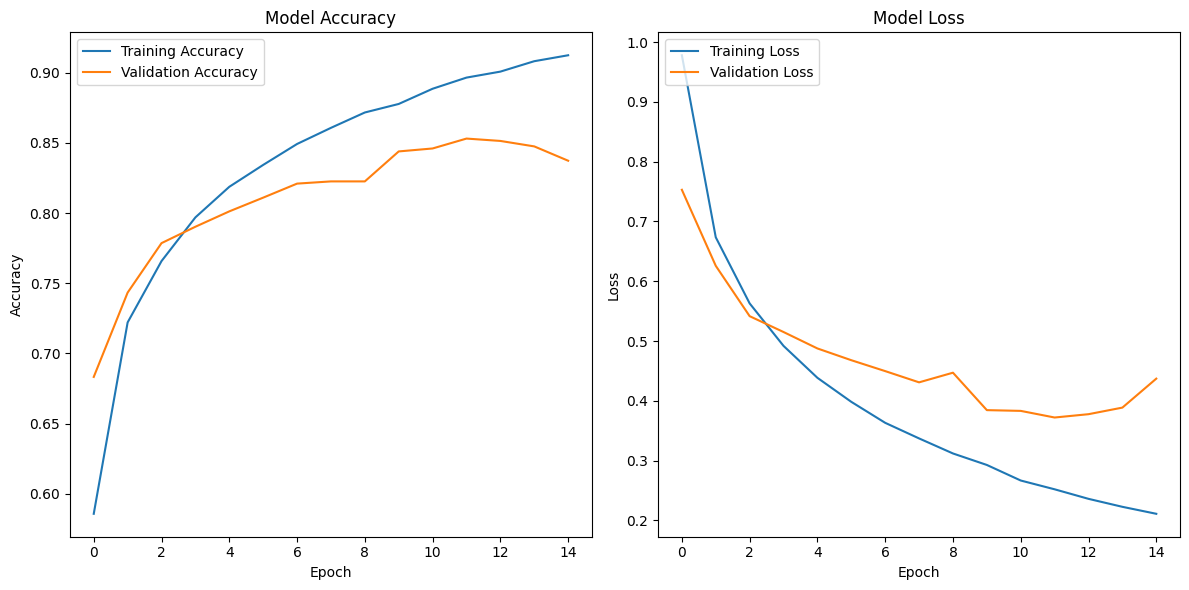

In [30]:
fit_model_and_plot(cnn1, 15, 64, history1)

In [31]:
cnn3 = models.Sequential()

cnn3.add(layers.Input(shape=(20, 20, 1)))
cnn3.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn3.add(layers.MaxPooling2D((2, 2)))
cnn3.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn3.add(layers.MaxPooling2D((2, 2)))
cnn3.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn3.add(layers.Flatten())
cnn3.add(layers.Dense(256, activation='relu'))
cnn3.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))

cnn3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = {}


Epoch 1/30
595/595 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.4963 - loss: 1.1646 - val_accuracy: 0.7023 - val_loss: 0.6930
Epoch 2/30
595/595 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.7154 - loss: 0.6688 - val_accuracy: 0.7628 - val_loss: 0.5702
Epoch 3/30
595/595 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.7787 - loss: 0.5256 - val_accuracy: 0.7869 - val_loss: 0.5024
Epoch 4/30
595/595 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.8157 - loss: 0.4408 - val_accuracy: 0.8094 - val_loss: 0.4519
Epoch 5/30
595/595 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.8384 - loss: 0.3809 - val_accuracy: 0.8200 - val_loss: 0.4333
Epoch 6/30
595/595 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.8504 - loss: 0.3475 - val_accuracy: 0.8301 - val_loss: 0.4011
Epoch 7/30
595/595 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.8747 - loss: 0.2985 - val_accuracy: 0.8379 - val_loss: 0.3889
Epoch 8/30
595/595 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.8817 - loss: 0.2768 - 

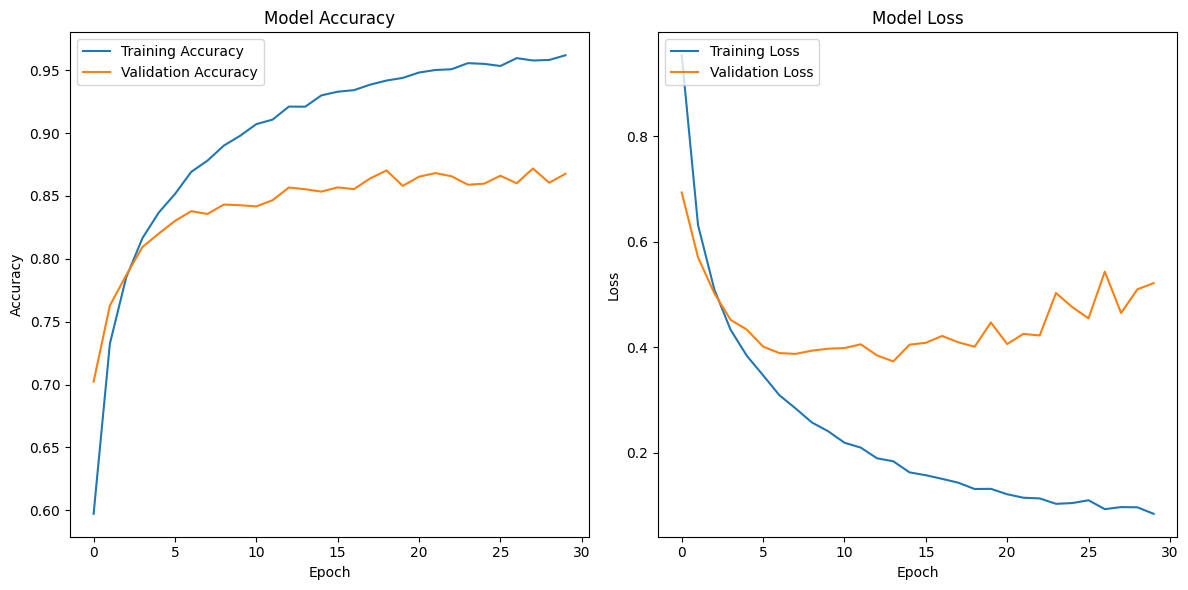

In [32]:
fit_model_and_plot(cnn3, 30, 64, history3)